In [1]:
import numpy as np
import pandas as pd
from sdv.metadata import SingleTableMetadata

from sdv.evaluation.single_table import evaluate_quality

import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer

import imblearn

from sklearn.model_selection import train_test_split

import utils
from ucimlrepo import fetch_ucirepo 

import aijack
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


# Synteettisen datan alusta

### WellbeingDataLab 

## Mitä on synteettinen data?

- Jordon et al. (2022): "*Synthetic data is data that has been generated using a purposebuilt mathematical model or algorithm, with the aim of solving a (set of) data science task(s)*"

    - Periaatteessa voi olla mitä tahansa datatyyppiä (taulukko, kuva, ääni, teksti, video, ...)

- Alusta keskittyy taulukkomuotoiseen dataan

## Tavoite IT-tiedekunnan osuudessa

- Luoda alusta ja toimintamalli synteettisen datan generointiin liikunta- ja hyvinvointidatasta


- Madaltaa kynnystä synteettisen datan testaamiseen

- Konkretisoida synteettinen data, sen mahdollisuudet ja sen rajoitteet

# Mihin synteettistä dataa voi käyttää?

1. Datan augmentointiin
    - Epätasapainoinen data: luodaan lisää datapisteitä huonosti edustetusta joukosta
\
&nbsp;



2. Yksityisyyden säilyttämiseen

     - Vältetään esimerkisi henkilökohtaisen terveysdatan levittäminen käyttämällä synteettisiä kopioita
\
&nbsp;
 
**EI VOI KÄYTTÄÄ DATAN PUUTTEESEEN**

    - Informaatiota ei voi luoda tyhjästä

### Yksityisyys

Lähtökohta: "*no reasonable basis to believe that the information can be used to identify an individual*" (HIPAA)

Miten?
- Rajoittamalla pääsyä datasettiin
    - Ei suoraan yksittäisiä arvoja
    - Ei loputtomasti hakuja
- Kohinaa hakuihin
    - Tarkkuus vs. yksityisyys
    - Isoilla $N$ vähemmän haittaa
- Poistetaan henkilökohtaiset tunnistetiedot (personally identifiable information, PII)
    - Nimien sijaan ID järjestysluvuilla
    - Sensuroidaan osa tiedosta (esim. osoitteesta kadunnimi ja talonro)


## Haasteet
1. Miten luodaan?


2. Kuinka testataan?


3. Mikä on riittävän hyvää?

## Datan syntetisointi

- 7 muuttujaa
- n = 143

In [2]:

demo_df = pd.read_csv("../demo_df.csv", index_col=0)

demo_df = demo_df.rename({"Ikä (v)":"Age","Sukupuoli (1=Nainen, 2=Mies)":"Sex","Pituus (cm)":"Height","Paino (kg)":"Weight","Leposyke":"Rest_hr", "Max_VO2 (60s): [ml/kg/min]":"Max_VO2", "Kuinka monta kertaa olet sairastanut flunssan/hengitystieoirejakso viim. 12 kk aikana?":"n_flu"},axis=1)
demo_df = demo_df.round({"Age" : 0})
demo_df['Sex'] -= 1

In [3]:
train_df, test_df = train_test_split(demo_df, test_size=0.5, random_state=19)

imputer = KNNImputer()
train_df = imputer.fit_transform(train_df)
test_df = imputer.transform(test_df)

train_df = pd.DataFrame(train_df,columns=demo_df.columns)
test_df = pd.DataFrame(test_df,columns=demo_df.columns)

In [4]:
tvae_samples, gan_samples, adsgan_samples, bayes_net_samples, arfgan_samples, norm_flows_samples, rtvae_samples = utils.generate_synthetic_data(train_df, 1000)
smote_samples, adasyn_samples, svmsmote_samples = utils.generate_smote(train_df, 1000, 'Sex')

tvae ctgan ready


[2024-10-02T21:15:56.468060+0300][244669][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
[2024-10-02T21:15:56.468819+0300][244669][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2024-10-02T21:15:56.469132+0300][244669][CRITICAL] module plugin_great load failed
[2024-10-02T21:15:56.477920+0300][244669][CRITICAL] module disabled: /home/pekkamela/wdl/wdl_workfolder/.venv/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
  6%|▋ 

adsgan ready


/home/pekkamela/wdl/wdl_workfolder/.venv/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/pekkamela/wdl/wdl_workfolder/.venv/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/pekkamela/wdl/wdl_workfolder/.venv/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/pekkamela/wdl/wdl_workfolder/.venv/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values b

bayes ready
Initial accuracy is 0.45774647887323944


[2024-10-02T21:16:19.513399+0300][244669][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2024-10-02T21:16:19.513925+0300][244669][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2024-10-02T21:16:19.514376+0300][244669][CRITICAL] module plugin_great load failed
[2024-10-02T21:16:19.514765+0300][244669][CRITICAL] module disabled: /home/pekkamela/wdl/wdl_workfolder/.venv/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


arfgan ready


 65%|██████▍   | 649/1000 [00:16<00:08, 39.56it/s]
[2024-10-02T21:16:36.846960+0300][244669][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2024-10-02T21:16:36.847489+0300][244669][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2024-10-02T21:16:36.847839+0300][244669][CRITICAL] module plugin_great load failed
[2024-10-02T21:16:36.848458+0300][244669][CRITICAL] module disabled: /home/pekkamela/wdl/wdl_workfolder/.venv/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py


nflows ready


 50%|█████     | 500/1000 [00:05<00:05, 92.08it/s] 


rtvae


In [6]:
# tvae_samples.to_csv("../yritysdemo/tvae_samples.csv")
# gan_samples.to_csv("../yritysdemo/gan_samples.csv")
# adsgan_samples.to_csv("../yritysdemo/adsgan_samples.csv")
# bayes_net_samples.to_csv("../yritysdemo/bayes_net_samples.csv")
# arfgan_samples.to_csv("../yritysdemo/arfgan_samples.csv")
# norm_flows_samples.to_csv("../yritysdemo/norm_flows_samples.csv")
# rtvae_samples.to_csv("../yritysdemo/rtvae_samples.csv")
# smote_samples.to_csv("../yritysdemo/smote_samples.csv")
# adasyn_samples.to_csv("../yritysdemo/adasyn_samples.csv")
# svmsmote_samples.to_csv("../yritysdemo/svmsmote_samples.csv")
# train_df.to_csv("../yritysdemo/train_df.csv")
# test_df.to_csv("../yritysdemo/test_df.csv")

tvae_samples = pd.read_csv("../yritysdemo/tvae_samples.csv", index_col=0)
gan_samples = pd.read_csv("../yritysdemo/gan_samples.csv", index_col=0)
adsgan_samples = pd.read_csv("../yritysdemo/adsgan_samples.csv", index_col=0)
bayes_net_samples = pd.read_csv("../yritysdemo/bayes_net_samples.csv", index_col=0)
arfgan_samples = pd.read_csv("../yritysdemo/arfgan_samples.csv", index_col=0)
norm_flows_samples = pd.read_csv("../yritysdemo/norm_flows_samples.csv", index_col=0)
rtvae_samples = pd.read_csv("../yritysdemo/rtvae_samples.csv", index_col=0)
smote_samples = pd.read_csv("../yritysdemo/smote_samples.csv", index_col=0)
adasyn_samples = pd.read_csv("../yritysdemo/adasyn_samples.csv", index_col=0)
svmsmote_samples = pd.read_csv("../yritysdemo/svmsmote_samples.csv", index_col=0)
train_df = pd.read_csv("../yritysdemo/train_df.csv", index_col=0)
test_df = pd.read_csv("../yritysdemo/test_df.csv", index_col=0)

## Validointi

- Mikä tekee synteettisestä datasta hyvää?


Desiderata:
1. Näyttää oikealta
2. Käyttäytyy kuin oikea data
3. Ei paljasta liikaa oikeasta datasta

$\rightarrow$ 1. Fidelity

$\rightarrow$ 2. Utility

$\rightarrow$ 3. Privacy

### Fidelity

- Tilastolliset testit
    - Kolmogorov-Smirnov distance
    - Pairwise correlation
- Mahdollisesti myös asiantuntijavalidointi

Testataan baseline-vastaavuus opetusdatan ja testidatan välillä:

(0.9006259780907668, 0.9428658642943765)

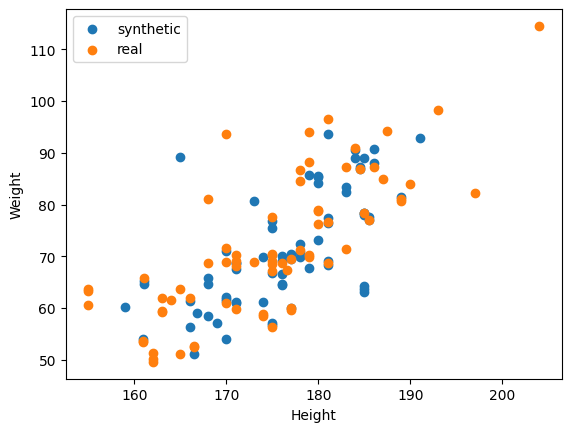

In [7]:
utils.visualize_and_test(train_df, test_df, train_df.columns[2], train_df.columns[3])

Quality report vertaa yksittäisten muuttujien jakaumia (*Column Shapes Score*) ja muuttujien välisiä korrelaatioita (*Column Pair Trends Score*) aidon ja synteettisen datasetin välillä.
Column Shapes tulee jatkuvilla muuttujilla (tässä kaikki, kun syöpästatus jätetään pois) kaavalla $1 - \frac{1}{n} \sum_{i=1}^n KS_{score}(x_{ri}, x_{si})$ jolloin 1 tai 100% tarkoittaa että datasettien jakaumat ovat samat ja 0 että ne ovat täysin eri.

Column Pair trends saadaan laskemalla molempien datasettien korrelaatiomatriisit, vähentämällä ne toisistaan, ja ottamalla sen alakolmiomatriisin alkioista keskiarvo ilman diagonaalia:
$0.5 - 0.5*\frac{1}{n} \sum_{i=1, j=1}^n Corr(x_{ri}, x_{rj}) -Corr(x_{si}, x_{sj}),  \quad j < i$. Se rajoitetaan välille $[0,1]$ vertailun helpottamiseksi, 0:n ollessa taas huonoin ja 1:n parhain. 

Overall Score on näiden kahden mitan keskiarvo, mutta painottaisin Column Pair Trendsia hieman korkeammalle. 

Kolmogorov-Smirnov: 0.8950704225352113
Korrelaatio numeerisissa: 0.9629039512571435


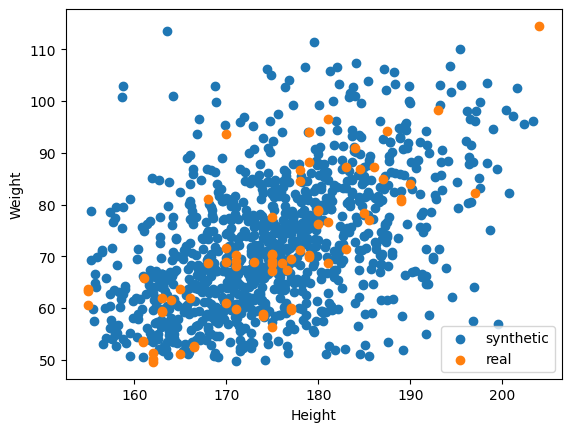

In [8]:
ks, corr = utils.visualize_and_test(train_df, arfgan_samples, train_df.columns[2], train_df.columns[3])
print(f"Kolmogorov-Smirnov: {ks}")
print(f"Korrelaatio numeerisissa: {corr}")

Kolmogorov-Smirnov: 0.8654483568075118
Korrelaatio numeerisissa: 0.9589680783446086


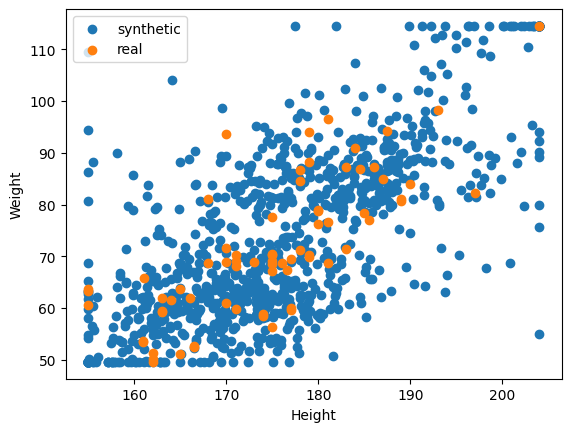

In [9]:
ks, corr = utils.visualize_and_test(train_df, norm_flows_samples, train_df.columns[2], train_df.columns[3])
print(f"Kolmogorov-Smirnov: {ks}")
print(f"Korrelaatio numeerisissa: {corr}")

Kolmogorov-Smirnov: 0.9064225352112676
Korrelaatio numeerisissa: 0.9481084720797823


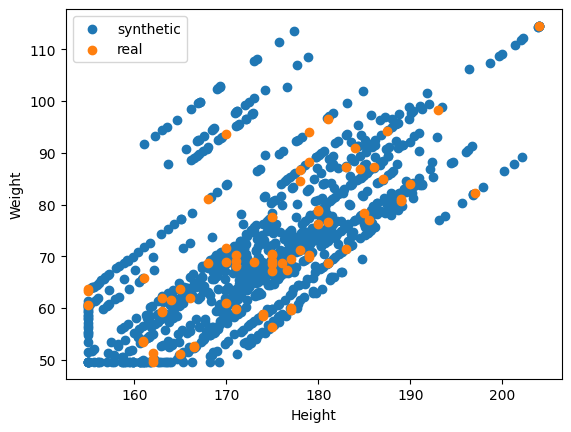

In [10]:
ks, corr = utils.visualize_and_test(train_df, bayes_net_samples, train_df.columns[2], train_df.columns[3])
print(f"Kolmogorov-Smirnov: {ks}")
print(f"Korrelaatio numeerisissa: {corr}")

Kolmogorov-Smirnov: 0.7398849765258215
Korrelaatio numeerisissa: 0.929952881023468


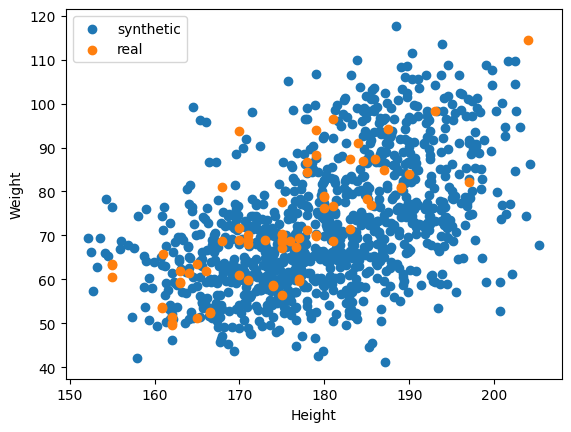

In [11]:
ks, corr = utils.visualize_and_test(train_df, gan_samples, train_df.columns[2], train_df.columns[3])
print(f"Kolmogorov-Smirnov: {ks}")
print(f"Korrelaatio numeerisissa: {corr}")

Kolmogorov-Smirnov: 0.8259929577464789
Korrelaatio numeerisissa: 0.946343463031125


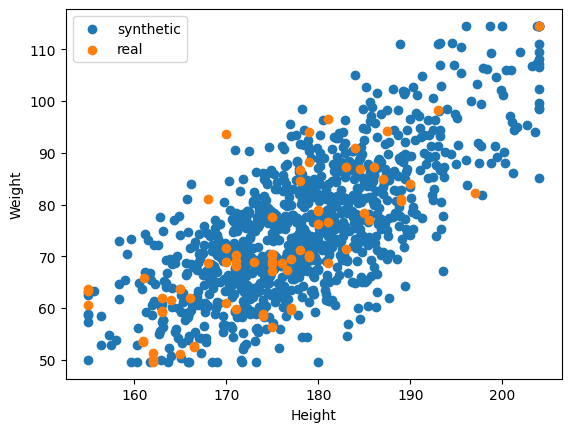

In [12]:
ks, corr = utils.visualize_and_test(train_df, adsgan_samples, train_df.columns[2], train_df.columns[3])
print(f"Kolmogorov-Smirnov: {ks}")
print(f"Korrelaatio numeerisissa: {corr}")

Kolmogorov-Smirnov: 0.8798356807511737
Korrelaatio numeerisissa: 0.9767123859679037


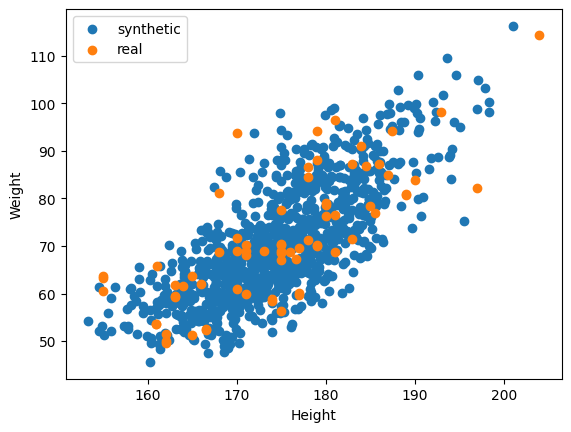

In [13]:
ks, corr = utils.visualize_and_test(train_df, tvae_samples, train_df.columns[2], train_df.columns[3])
print(f"Kolmogorov-Smirnov: {ks}")
print(f"Korrelaatio numeerisissa: {corr}")

Kolmogorov-Smirnov: 0.9061032863849765
Korrelaatio numeerisissa: 0.975442894568806


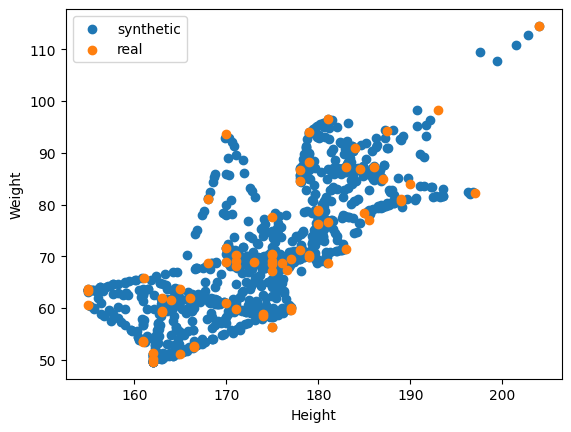

In [14]:
ks, corr = utils.visualize_and_test(train_df, smote_samples, train_df.columns[2], train_df.columns[3])
print(f"Kolmogorov-Smirnov: {ks}")
print(f"Korrelaatio numeerisissa: {corr}")

Kolmogorov-Smirnov: 0.794576016937486
Korrelaatio numeerisissa: 0.9422219818181135


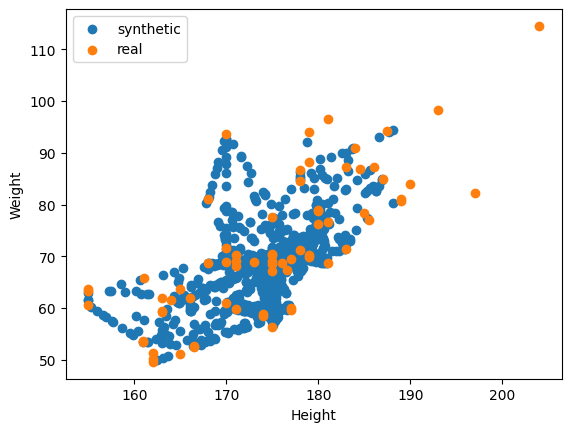

In [15]:
ks, corr = utils.visualize_and_test(train_df, adasyn_samples, train_df.columns[2], train_df.columns[3])
print(f"Kolmogorov-Smirnov: {ks}")
print(f"Korrelaatio numeerisissa: {corr}")

In [16]:
print("adasyn_df")
print(f"Kolmogorov-Smirnov: {utils.ks_score(train_df, adasyn_samples)}")
print(f"Korrelaatio numeerisissa: {utils.calc_corr_score(train_df, adasyn_samples)}")

print("\nadsgan")
print(f"Kolmogorov-Smirnov: {utils.ks_score(train_df, adsgan_samples)}")
print(f"Korrelaatio numeerisissa: {utils.calc_corr_score(train_df, adsgan_samples)}")

print("\narfgan")
print(f"Kolmogorov-Smirnov: {utils.ks_score(train_df, arfgan_samples)}")
print(f"Korrelaatio numeerisissa: {utils.calc_corr_score(train_df, arfgan_samples)}")

print("\nbayes_net")
print(f"Kolmogorov-Smirnov: {utils.ks_score(train_df, bayes_net_samples)}")
print(f"Korrelaatio numeerisissa: {utils.calc_corr_score(train_df, bayes_net_samples)}")

print("\nctgan")
print(f"Kolmogorov-Smirnov: {utils.ks_score(train_df, gan_samples)}")
print(f"Korrelaatio numeerisissa: {utils.calc_corr_score(train_df, gan_samples)}")

print("\ntvae")
print(f"Kolmogorov-Smirnov: {utils.ks_score(train_df, tvae_samples)}")
print(f"Korrelaatio numeerisissa: {utils.calc_corr_score(train_df, tvae_samples)}")

print("\nnormflow")
print(f"Kolmogorov-Smirnov: {utils.ks_score(train_df, norm_flows_samples)}")
print(f"Korrelaatio numeerisissa: {utils.calc_corr_score(train_df, norm_flows_samples)}")

print("\nsmote")
print(f"Kolmogorov-Smirnov: {utils.ks_score(train_df, smote_samples)}")
print(f"Korrelaatio numeerisissa: {utils.calc_corr_score(train_df, smote_samples)}")

print("\nbaseline")
print(f"Kolmogorov-Smirnov: {utils.ks_score(train_df, test_df)}")
print(f"Korrelaatio numeerisissa: {utils.calc_corr_score(train_df, test_df)}")

adasyn_df
Kolmogorov-Smirnov: 0.794576016937486
Korrelaatio numeerisissa: 0.9422219818181135

adsgan


Kolmogorov-Smirnov: 0.8259929577464789
Korrelaatio numeerisissa: 0.946343463031125

arfgan
Kolmogorov-Smirnov: 0.8950704225352113
Korrelaatio numeerisissa: 0.9629039512571435

bayes_net
Kolmogorov-Smirnov: 0.9064225352112676
Korrelaatio numeerisissa: 0.9481084720797823

ctgan
Kolmogorov-Smirnov: 0.7398849765258215
Korrelaatio numeerisissa: 0.929952881023468

tvae
Kolmogorov-Smirnov: 0.8798356807511737
Korrelaatio numeerisissa: 0.9767123859679037

normflow
Kolmogorov-Smirnov: 0.8654483568075118
Korrelaatio numeerisissa: 0.9589680783446086

smote
Kolmogorov-Smirnov: 0.9061032863849765
Korrelaatio numeerisissa: 0.975442894568806

baseline
Kolmogorov-Smirnov: 0.9006259780907668
Korrelaatio numeerisissa: 0.9428658642943765


## Utility

- Kuinka hyvin synteettinen data vastaa aitoa ennustamistilanteessa
  
Halutaan siis että:
1. Suorituskyky synteettisellä on lähes yhtä hyvä kuin aidolla
2. Eri malleja vertailtaessa niiden erot on samat

![alt text](./utilitytest_graph_fi2.png "Title")

### Testataan eri malleja

In [17]:
metrics_num, metrics_cat = utils.utility_test(tvae_samples, train_df, test_df)

In [18]:
metrics_num

Age    Height    Weight   Rest_hr   Max_VO2  \
MSE_trtr GradBoost   0.819504  0.380495  0.339650  2.366374  0.897636   
         RandForest  0.828756  0.370714  0.413360  1.819302  0.877616   
         SVM         1.128701  0.403363  0.389164  1.541614  1.109993   
         NearNeigh   1.133304  0.593146  0.530268  2.040470  1.114051   
         DecTree     1.229377  0.515486  0.632151  3.699925  1.318397   
         MLP         1.446188  0.416465  0.655494  2.511473  1.026392   
         Regress     0.962384  0.346148  0.349937  1.432351  1.021524   
MSE_tstr GradBoost   1.197487  0.363549  0.398776  1.719631  1.156517   
         RandForest  1.031048  0.345918  0.441084  1.790156  1.184247   
         SVM         1.061620  0.408728  0.464829  1.750643  1.119450   
         NearNeigh   1.125434  0.601547  0.513961  1.958135  1.420380   
         DecTree     1.764732  0.524579  0.844448  2.332179  1.957284   
         MLP         1.049549  0.400603  0.443461  1.820875  1.100589   
         Regress     1.071323  0.304504  0.348537  1.569852  1.121358   
R2_trtr  GradBoost   0.272174  0.569026  0.593336 -0.765464  0.424732   
         RandForest  0.263957  0.580104  0.505083 -0.357314  0.437563   
         SVM        -0.002433  0.543123  0.534053 -0.150141  0.288639   
         NearNeigh  -0.006521  0.328163  0.365110 -0.522319  0.286038   
         DecTree    -0.091846  0.416125  0.243125 -1.760377  0.155079   
         MLP        -0.284402  0.528284  0.215176 -0.873717  0.342216   
         Regress     0.145278  0.607929  0.581020 -0.068624  0.345336   
R2_tstr  GradBoost  -0.063523  0.588220  0.522545 -0.282953  0.258823   
         RandForest  0.084296  0.608190  0.471889 -0.335569  0.241052   
         SVM         0.057144  0.537047  0.443460 -0.306090  0.282578   
         NearNeigh   0.000469  0.318647  0.384634 -0.460892  0.089721   
         DecTree    -0.567311  0.405826 -0.011059 -0.739952 -0.254364   
         MLP         0.067865  0.546250  0.469043 -0.358487  0.294666   
         Regress     0.048527  0.655098  0.582697 -0.171208  0.281356   

                        n_flu  
MSE_trtr GradBoost   1.194456  
         RandForest  1.155255  
         SVM         1.470390  
         NearNeigh   2.002146  
         DecTree     2.348118  
         MLP         2.286553  
         Regress     1.423293  
MSE_tstr GradBoost   1.405363  
         RandForest  1.337344  
         SVM         1.651245  
         NearNeigh   1.946156  
         DecTree     2.215848  
         MLP         1.640433  
         Regress     1.501225  
R2_trtr  GradBoost   0.253497  
         RandForest  0.277997  
         SVM         0.081046  
         NearNeigh  -0.251288  
         DecTree    -0.467511  
         MLP        -0.429034  
         Regress     0.110480  
R2_tstr  GradBoost   0.121686  
         RandForest  0.164196  
         SVM        -0.031984  
         NearNeigh  -0.216295  
         DecTree    -0.384845  
         MLP        -0.025227  
         Regress     0.061775

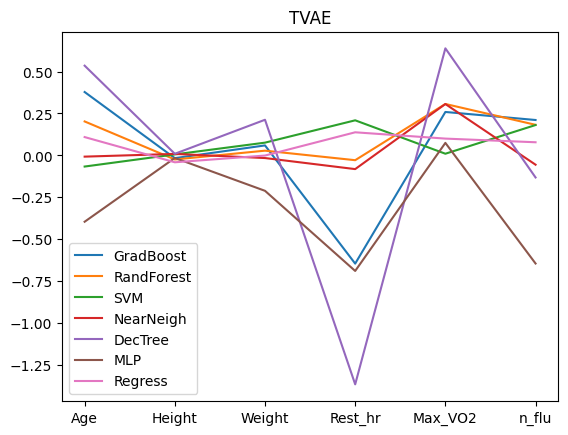

In [19]:
trtr = metrics_num.loc['MSE_trtr']
tstr = metrics_num.loc['MSE_tstr']

diff = tstr - trtr

plt.plot(diff.T, label = diff.index)
plt.title("TVAE")
plt.legend()
plt.show()

In [20]:
metrics_cat

Sex
F1_trtr GradBoost   0.861111
        RandForest  0.847222
        SVM         0.833333
        NearNeigh   0.847222
        DecTree     0.833333
        MLP         0.888889
        Regress     0.930556
F1_tstr GradBoost   0.819444
        RandForest  0.819444
        SVM         0.847222
        NearNeigh   0.791667
        DecTree     0.722222
        MLP         0.861111
        Regress     0.847222

In [21]:
trtr = metrics_cat.loc['F1_trtr']
tstr = metrics_cat.loc['F1_tstr']
tstr - trtr

,Sex
GradBoost,-0.041667
RandForest,-0.027778
SVM,0.013889
NearNeigh,-0.055556
DecTree,-0.111111
MLP,-0.027778
Regress,-0.083333


In [22]:
metrics_num, metrics_cat = utils.utility_test(smote_samples.reset_index(drop=True), train_df, test_df)

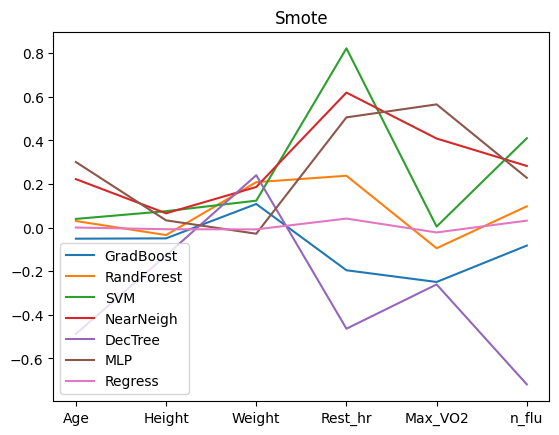

In [23]:
trtr = metrics_num.loc['MSE_trtr']
tstr = metrics_num.loc['MSE_tstr']
diff = tstr - trtr

plt.plot(diff.T, label = diff.index)
plt.title('Smote')
plt.legend()
plt.show()

In [24]:
trtr = metrics_cat.loc['F1_trtr']
tstr = metrics_cat.loc['F1_tstr']
tstr - trtr

,Sex
GradBoost,0.041667
RandForest,0.055556
SVM,0.027778
NearNeigh,-0.069444
DecTree,0.013889
MLP,0.000000
Regress,0.013889


## Privacy

Tavoitteena on suojella yksityisyyttä!

Jos synteettinen data paljastaa liikaa, menetetään kaikki hyöty.

Yksityisyyden testaaminen yleisesti haastavaa, mutta voidaan arvioida esim:

1. Testaamalla synteettisten pisteiden etäisyyttä aitoihin pisteisiin
2. Simuloimalla hyökkäyksiä

### Etäisyydet
- synteettisten pisteiden etäisyys lähimpiin testidatan pisteisiin tulisi olla sama kuin opetusdatan pisteisiin

In [25]:
train_dist, test_dist = utils.distance_score(train_df, test_df, tvae_samples)

print("Keskimääräiset etäisyydet:")
print(f"Opetusdatan pisteisiin: {np.round(train_dist,2)}")
print(f"Testidatan pisteisiin: {np.round(test_dist,2)}")
print(f"Suhde: {np.round(train_dist/test_dist,3)}")


Keskimääräiset etäisyydet:
Opetusdatan pisteisiin: 9.14
Testidatan pisteisiin: 9.84
Suhde: 0.929


In [26]:
train_dist, test_dist = utils.distance_score(train_df, test_df, smote_samples)
print("Keskimääräiset etäisyydet:")
print(f"Opetusdatan pisteisiin: {np.round(train_dist,2)}")
print(f"Testidatan pisteisiin: {np.round(test_dist,2)}")
print(f"Suhde: {np.round(train_dist/test_dist,3)}")

Keskimääräiset etäisyydet:
Opetusdatan pisteisiin: 4.01
Testidatan pisteisiin: 8.95
Suhde: 0.448


### Naivi tunnistushyökkäys
- Opetetaan koneoppimismalli tunnistamaan onko kyseessä synteettinen piste ollut opetusdatassa

In [27]:
result = utils.naive_attack(train_df.copy(), test_df.copy(), tvae_samples)
print(f"Tarkkuus: {result}")

Tarkkuus: 0.476


In [28]:
result = utils.naive_attack(train_df.copy(), test_df.copy(), smote_samples)
print(f"Tarkkuus: {result}")

Tarkkuus: 0.6549295774647887


In [29]:
result = utils.naive_attack(train_df.copy(), test_df.copy(), adsgan_samples)
print(f"Tarkkuus: {result}")

Tarkkuus: 0.502


## Yhteenveto

Alustalta tulee löytymään menetelmiä synteettisen datan luomiseen ja sen testaamiseen.

Näiden avulla voidaan kokeilla sopiiko synteettinen data omaan yritysmalliin.

Parempilaatuinen synteettinen data vaatii kuitenkin kustomoidumpia malleja.

Haasteet:
- Mikä on riittävän hyvää?
- Miten validoidaan?
- Kuinka varmistetaan että alkuperäinen data ei ole palautettavissa?
